In [1]:
conda activate CDT1E3


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
from pca import pca
import xlrd
import geopandas as gpd
import mpl_axes_aligner
from sklearn.cluster import KMeans

#sns.set()
%matplotlib inline

In [4]:
carpeta_Ejercicio3 = 'K:\\Mi unidad\\Google Drive\\MCE\\Ejercicios\\Ciencia de Datos\\Tarea 1\\Ejercicio3'
data_ruta = carpeta_Ejercicio3 + '\\IMM_2020.xls'
data = pd.read_excel(data_ruta, sheet_name='IMM_2020')
data.head()

CVE_ENT         NOM_ENT  CVE_MUN         NOM_MUN  POB_TOT     ANALF  \
0        1  Aguascalientes     1001  Aguascalientes   948990  1.644738   
1        1  Aguascalientes     1002        Asientos    51536  3.526405   
2        1  Aguascalientes     1003        Calvillo    58250  4.491509   
3        1  Aguascalientes     1004           Cosío    17000  3.144867   
4        1  Aguascalientes     1005     Jesús María   129929  2.380588   

       SBASC     OVSDE     OVSEE     OVSAE      OVPT       VHAC    PL.5000  \
0  20.367220  0.104799  0.113169  0.378610  0.591434  10.339530   7.523683   
1  33.906364  2.650373  0.486448  0.858160  1.352430  22.942305  78.221049   
2  42.482450  0.365177  0.516760  0.800978  1.040411  19.219858  51.301288   
3  27.696745  0.712855  0.577354  0.659833  1.030989  22.716866  65.470588   
4  26.692477  0.277034  0.354957  0.860426  1.312652  16.404575  37.164143   

       PO2SM    IM_2020   GM_2020  IMN_2020  
0  54.226594  60.318795  Muy bajo  0.944508  
1  78.565471  56.546071  Muy bajo  0.885433  
2  79.259777  57.058251  Muy bajo  0.893453  
3  81.726369  57.114030  Muy bajo  0.894326  
4  56.748753  59.011762  Muy bajo  0.924042

In [5]:
indicadores = [
    'ANALF', # Porcentaje de población analfabeta de 15 años o más
    'SBASC', # Porcentaje de población de 15 años o más sin educación básica
    'OVSDE', # Porcentaje de ocupantes en viviendas particulares habitadas sin drenaje ni excusado
    'OVSEE', # Porcentaje de ocupantes en viviendas particulares habitadas sin energía eléctrica
    'OVSAE', # Porcentaje de ocupantes en viviendas particulares habitadas sin agua entubada
    'OVPT', # Porcentaje de ocupantes en viviendas particulares habitadas con piso de tierra
    'VHAC', # Porcentaje de viviendas particulares con hacinamiento
    'PL.5000', # Porcentaje de población que vive en localidades menores a 5 000 habitantes
    'PO2SM' # Porcentaje de población ocupada con ingresos de hasta 2 salarios mínimos
]

data_indi = data[indicadores]

# Vamos a mostrar las primeras filas del nuevo DataFrame para confirmar que está correcto
data_indi.head()

ANALF      SBASC     OVSDE     OVSEE     OVSAE      OVPT       VHAC  \
0  1.644738  20.367220  0.104799  0.113169  0.378610  0.591434  10.339530   
1  3.526405  33.906364  2.650373  0.486448  0.858160  1.352430  22.942305   
2  4.491509  42.482450  0.365177  0.516760  0.800978  1.040411  19.219858   
3  3.144867  27.696745  0.712855  0.577354  0.659833  1.030989  22.716866   
4  2.380588  26.692477  0.277034  0.354957  0.860426  1.312652  16.404575   

     PL.5000      PO2SM  
0   7.523683  54.226594  
1  78.221049  78.565471  
2  51.301288  79.259777  
3  65.470588  81.726369  
4  37.164143  56.748753

In [6]:
def sklearn_pca(data):
    # Estandarización de los datos
    X = StandardScaler().fit_transform(data)

    # Ajuste de PCA
    pca = PCA()
    pca.fit(X)

    dat = {
        'PC': range(1, pca.n_components_ + 1),
        'std': np.sqrt(pca.explained_variance_),
        'var_prop': pca.explained_variance_ratio_,
        'cum_prop': np.cumsum(pca.explained_variance_ratio_)
    }
    stds = pd.DataFrame(data=dat)
    print(stds)

    comps = pd.DataFrame(data = pca.components_.T, columns= ['pc' + str(i) for i in range(1, pca.n_components_ + 1)],
                         index = data.columns)
    print(comps)

    # Proyección de los datos
    proj = pd.DataFrame(pca.transform(X), columns=['pc' + str(i) for i in range(1, pca.n_components_ + 1)])

    # pairplot
    sns.set()
    sns.pairplot(proj, height = 2)
    plt.show()

    pca_dataset = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2']})
    scatter_fig = px.scatter(pca_dataset, x = 'pc1', y = 'pc2')
    scatter_fig.update_layout(autosize = False, width = 600, height = 600)
    scatter_fig.show()

    return stds, comps

   PC       std  var_prop  cum_prop
0   1  2.104043  0.491689  0.491689
1   2  1.133920  0.142806  0.634495
2   3  0.916967  0.093388  0.727883
3   4  0.862860  0.082692  0.810575
4   5  0.752737  0.062932  0.873506
5   6  0.631369  0.044274  0.917780
6   7  0.570875  0.036196  0.953976
7   8  0.497175  0.027454  0.981430
8   9  0.408899  0.018570  1.000000
              pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
ANALF    0.411104 -0.108659 -0.093362 -0.183637  0.005263  0.551280 -0.093652   
SBASC    0.394736 -0.291060  0.111403  0.019709  0.069394  0.505365  0.178865   
OVSDE    0.237374  0.509972  0.499260 -0.170189 -0.505338  0.083915 -0.184955   
OVSEE    0.265188  0.561235  0.226750  0.167457  0.469933 -0.091366  0.451798   
OVSAE    0.238413  0.277631 -0.578108  0.624842 -0.365806  0.056789 -0.028145   
OVPT     0.371528  0.118576 -0.273067 -0.140136  0.535142 -0.170185 -0.390192   
VHAC     0.363212  0.021881 -0.247235 -0.501820 -0.230906 -0.411993 -0.11

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


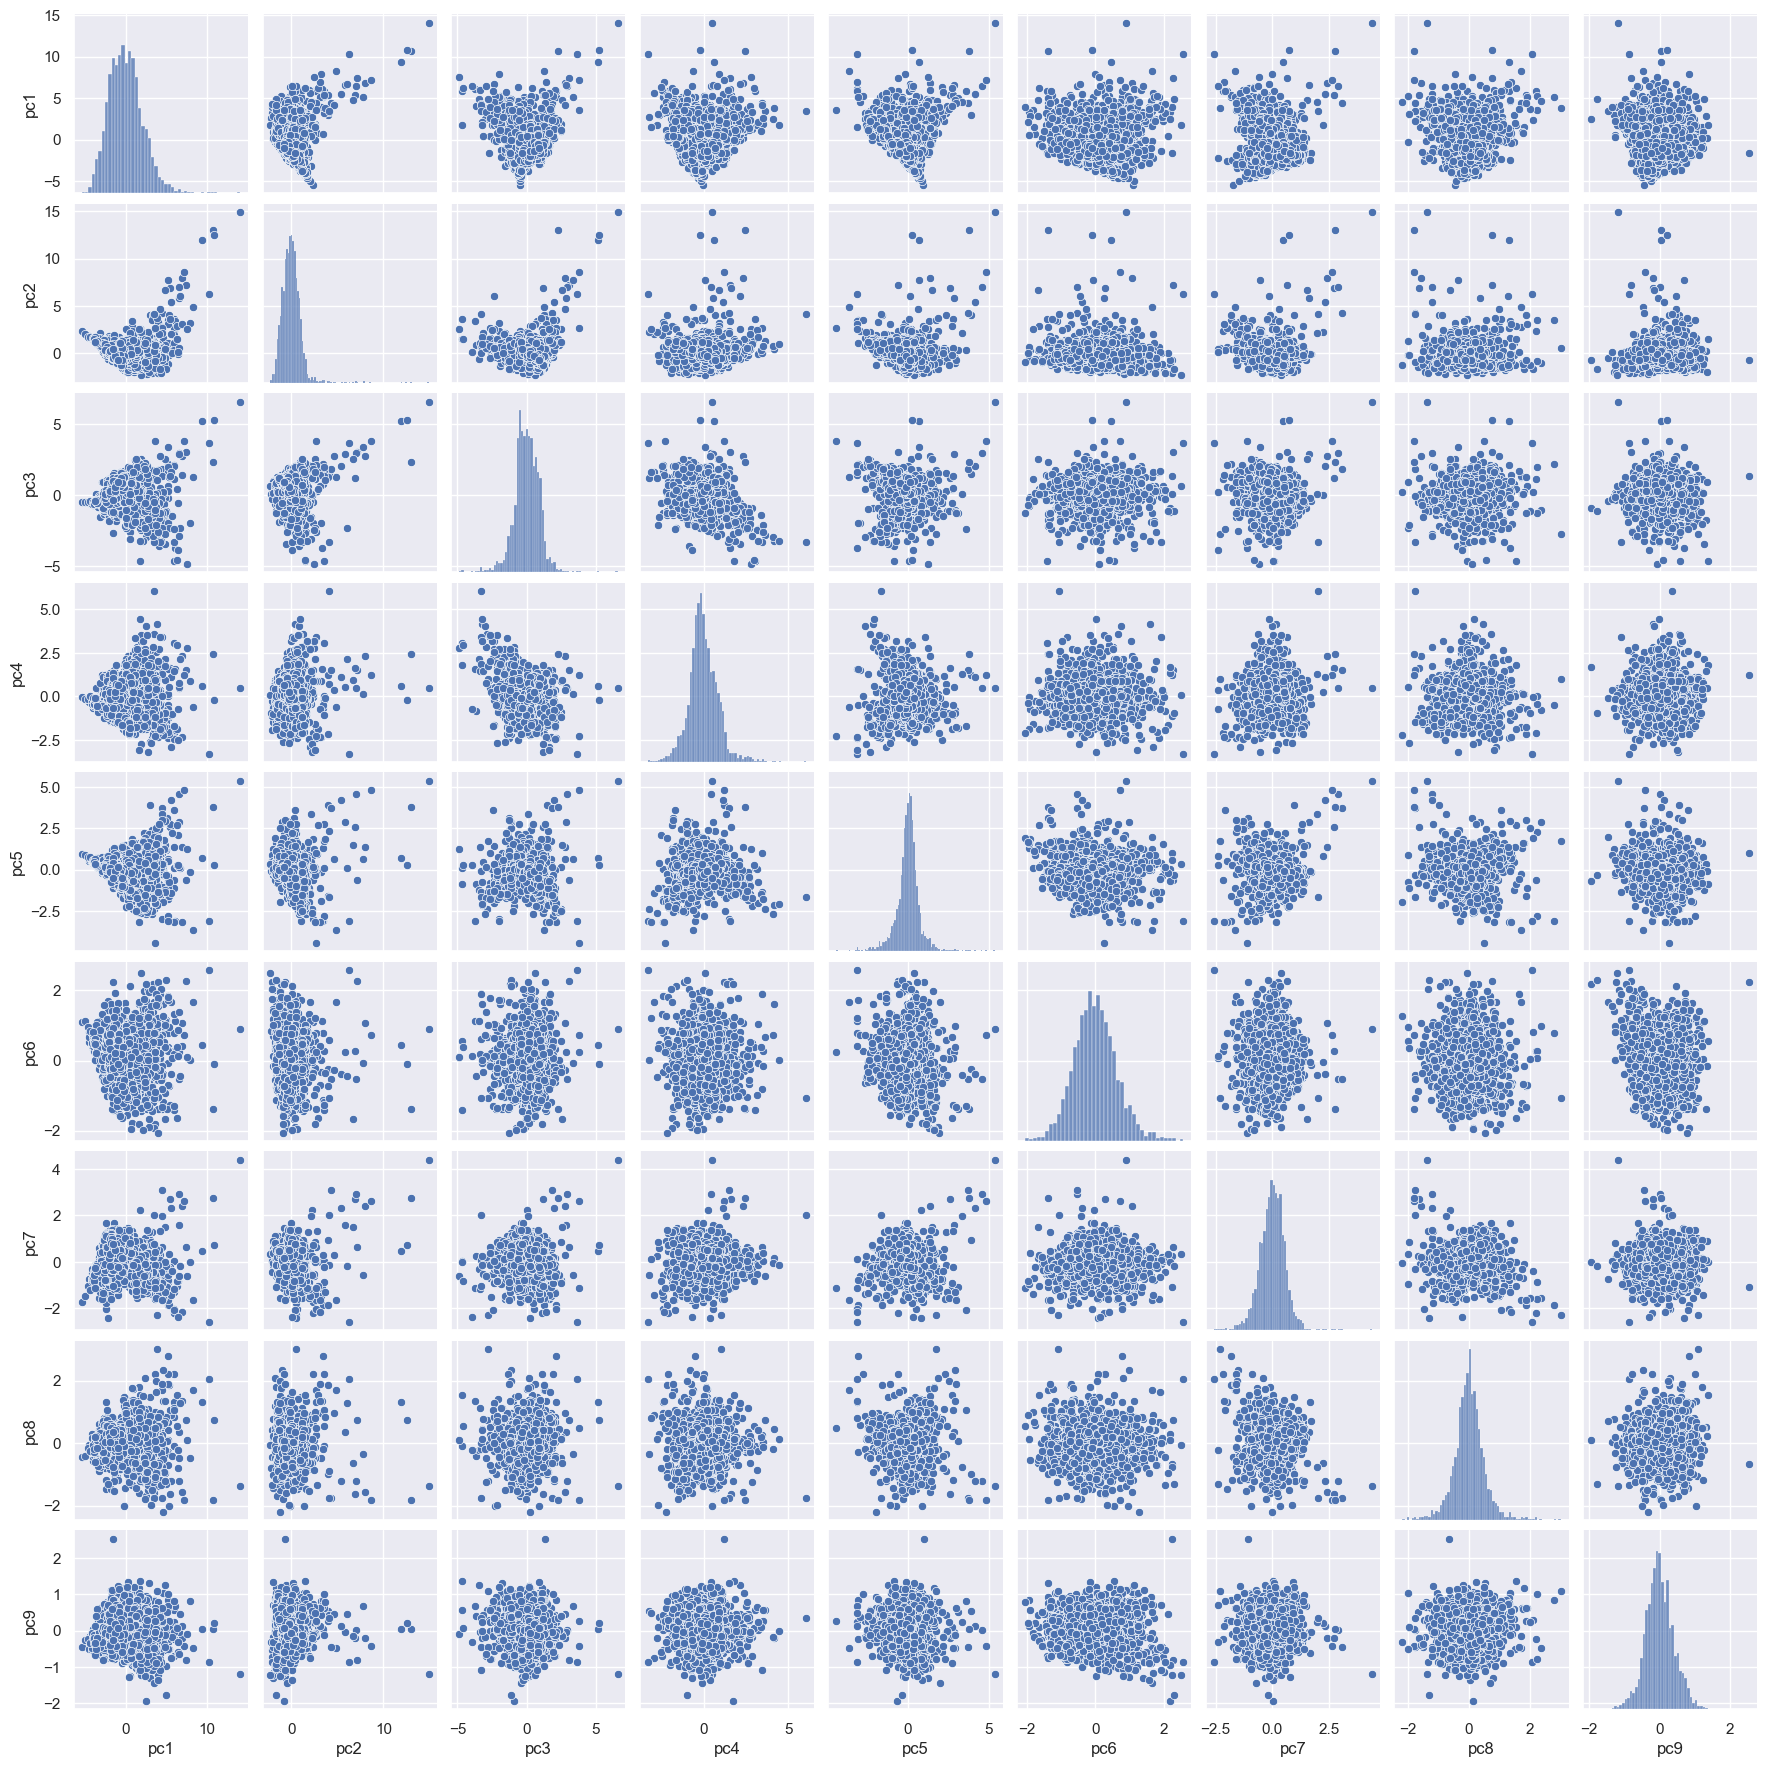

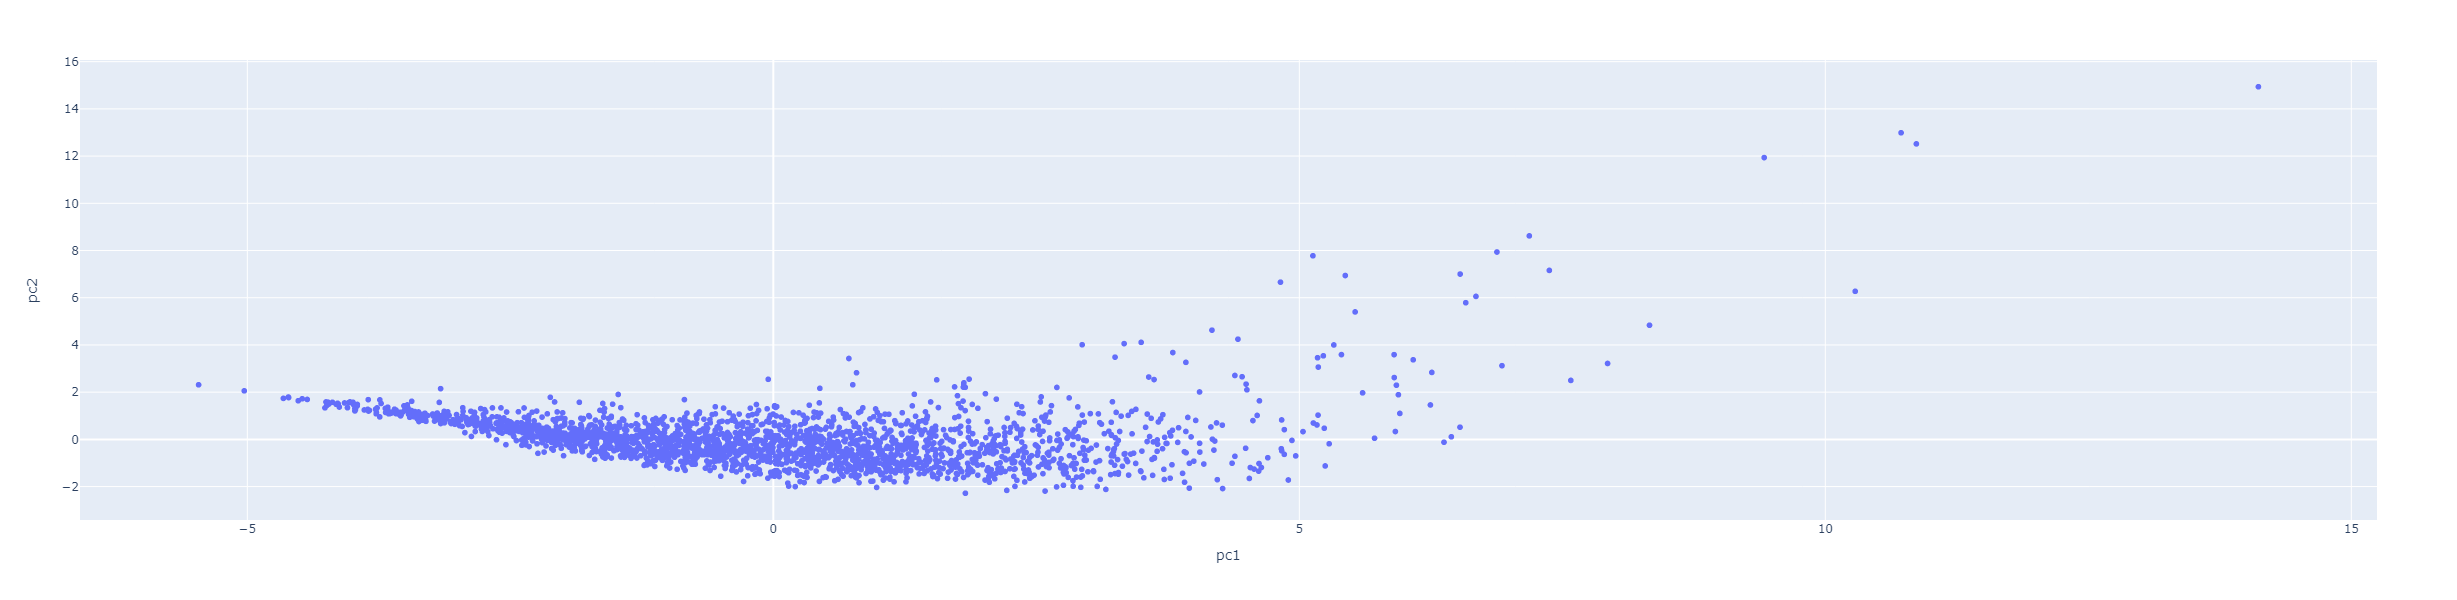

In [7]:
stds, comps = sklearn_pca(data_indi)

In [8]:
def guardar_como_csv(data_frame, nombre_archivo, carpeta_destino = ''):
    ruta_archivo = os.path.join(carpeta_destino, nombre_archivo)
    data_frame.to_csv(ruta_archivo, index = True)
    print(f"DataFrame guardado como {ruta_archivo}")

carpeta_files = 'K:\\Mi unidad\\Google Drive\\MCE\\Ejercicios\\Ciencia de Datos\\\Tarea 1\\Final\\files'
guardar_como_csv(round(stds, 2), 'tabla3_1.csv', carpeta_files)
guardar_como_csv(round(comps, 2), 'tabla3_2.csv', carpeta_files)

DataFrame guardado como K:\Mi unidad\Google Drive\MCE\Ejercicios\Ciencia de Datos\\Tarea 1\Final\files\tabla3_1.csv
DataFrame guardado como K:\Mi unidad\Google Drive\MCE\Ejercicios\Ciencia de Datos\\Tarea 1\Final\files\tabla3_2.csv


In [9]:
comps

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
ANALF    0.411104 -0.108659 -0.093362 -0.183637  0.005263  0.551280 -0.093652   
SBASC    0.394736 -0.291060  0.111403  0.019709  0.069394  0.505365  0.178865   
OVSDE    0.237374  0.509972  0.499260 -0.170189 -0.505338  0.083915 -0.184955   
OVSEE    0.265188  0.561235  0.226750  0.167457  0.469933 -0.091366  0.451798   
OVSAE    0.238413  0.277631 -0.578108  0.624842 -0.365806  0.056789 -0.028145   
OVPT     0.371528  0.118576 -0.273067 -0.140136  0.535142 -0.170185 -0.390192   
VHAC     0.363212  0.021881 -0.247235 -0.501820 -0.230906 -0.411993 -0.111150   
PL.5000  0.295071 -0.331886  0.455509  0.496940  0.048234 -0.287226 -0.452082   
PO2SM    0.366936 -0.355886  0.028442  0.006630 -0.207650 -0.375342  0.592564   

              pc8       pc9  
ANALF   -0.193382 -0.653179  
SBASC    0.009322  0.674076  
OVSDE    0.327640  0.037319  
OVSEE   -0.315203 -0.050731  
OVSAE   -0.000852  0.060100  
OVPT     0.532407  0.051535  
VHAC    -0.519737  0.221614  
PL.5000 -0.232178 -0.072366  
PO2SM    0.385130 -0.233225

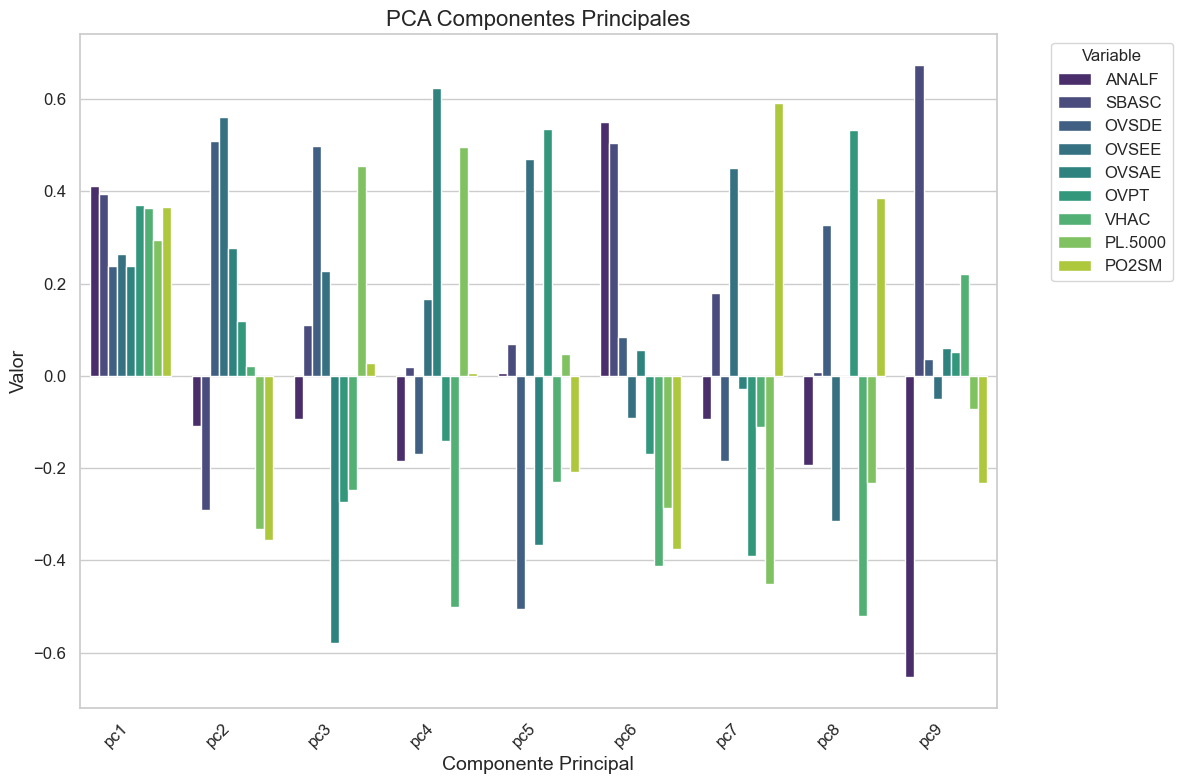

In [11]:
sns.set_style('whitegrid') #Etilo
comps_graf = pd.DataFrame(comps)
df_pcs = comps_graf.reset_index().melt(id_vars = ['index'], var_name = 'PCI', value_name = 'Loading')

# Graficar
plt.figure(figsize = (12, 8))
sns.barplot(x = 'PCI', y = 'Loading', hue = 'index', data = df_pcs, palette = 'viridis')
plt.title('PCA Componentes Principales', fontsize = 16)
plt.xlabel('Componente Principal', fontsize = 14)
plt.ylabel('Valor', fontsize = 14)
plt.xticks(rotation = 45, ha = 'right', fontsize = 12)
plt.yticks(fontsize =12)
plt.legend(title='Variable', bbox_to_anchor = (1.05, 1), loc ='upper left', fontsize = 12)
plt.tight_layout()
plt.savefig(carpeta_files + '\\Figura3_1.png', dpi = 300, bbox_inches = 'tight')# Mostrar el heatmap
plt.show()

[scatterd] >INFO> Create scatterplot


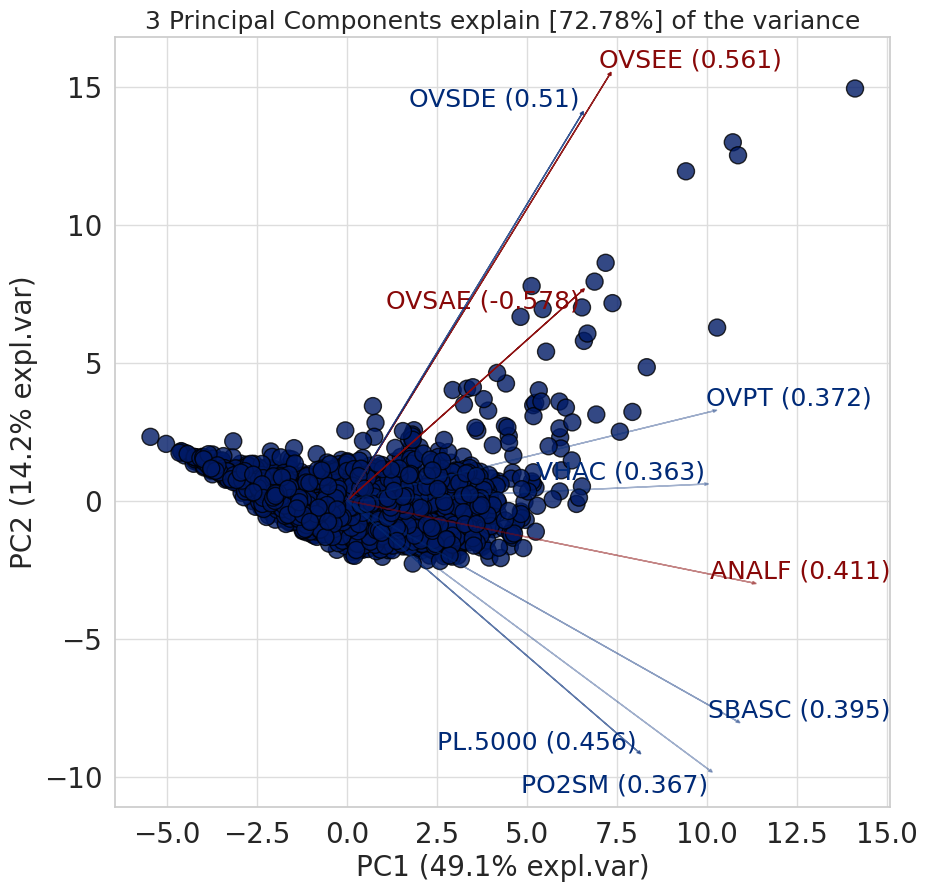

In [27]:
def sklearn_biplot(data, row_labels, col_labels):
    # Estandarización de los datos
    X = StandardScaler().fit_transform(data)
    model = pca(n_components=3)
    results = model.fit_transform(X, row_labels=row_labels, col_labels=col_labels, verbose=False)
    fig, ax = model.biplot(figsize=(10, 10), verbose=False)
    return fig, ax

fig, ax = sklearn_biplot(data_indi, data_indi.index, data_indi.columns)
fig.savefig(carpeta_files + '\\Figura3_2.png', dpi=300, bbox_inches='tight')

#### Nuvo Indice

In [14]:
def IM_New(data, pci_j):    
    # Estandarizacion de los datos
    X = StandardScaler().fit_transform(data)
    
    # Calculamos X^T*alpha
    pc1_scores = np.dot(X, pci_j.values)

    # Estandarizando en 0-1
    pc1_min = pc1_scores.min()
    pc1_max = pc1_scores.max()
    IM_nuevo = 1 - (pc1_scores - pc1_min) / (pc1_max - pc1_min)

    IM_N = pd.DataFrame(IM_nuevo, columns=['IM_nuevo'])
    
    return IM_N

In [15]:
PC1 = comps['pc1']
PC2 = comps['pc2']
PC3 = comps['pc3']

In [16]:
IM_PC1 = IM_New(data_indi, PC1)
IM_PC1

IM_nuevo
0     0.917503
1     0.792031
2     0.799763
3     0.807811
4     0.875325
...        ...
2464  0.748017
2465  0.792395
2466  0.913742
2467  0.804854
2468  0.773555

[2469 rows x 1 columns]

In [17]:
IM_PC2 = IM_New(data_indi, PC2)
IM_PC2

IM_nuevo
0     0.797816
1     0.875332
2     0.886226
3     0.876462
4     0.820749
...        ...
2464  0.911612
2465  0.883965
2466  0.799861
2467  0.842551
2468  0.912133

[2469 rows x 1 columns]

In [18]:
IM_PC3 = IM_New(data_indi, PC3)
IM_PC3

IM_nuevo
0     0.609525
1     0.523943
2     0.559115
3     0.554502
4     0.585713
...        ...
2464  0.501364
2465  0.525355
2466  0.609927
2467  0.603945
2468  0.496071

[2469 rows x 1 columns]

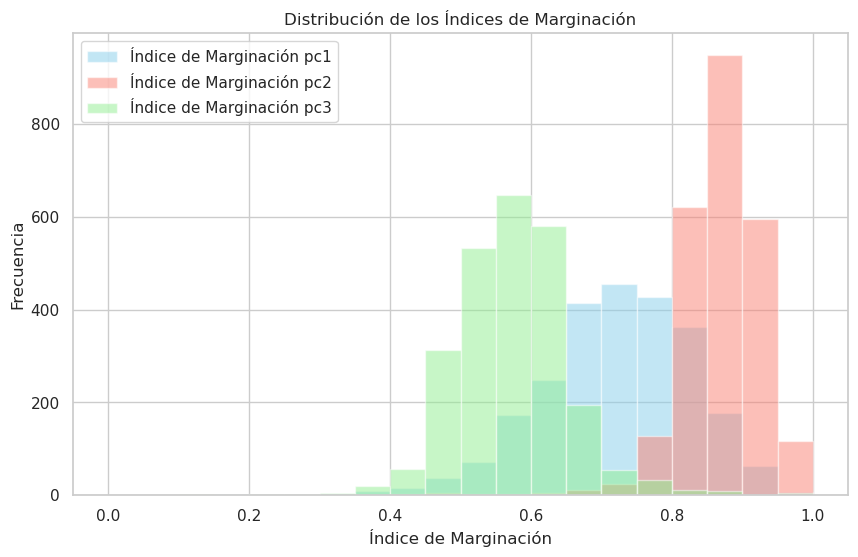

In [19]:
plt.figure(figsize=(10, 6))

# Histograma 1
plt.hist(IM_PC1['IM_nuevo'], bins=20, color='skyblue', alpha=0.5, label='Índice de Marginación pc1')

# Histograma 2
plt.hist(IM_PC2['IM_nuevo'], bins=20, color='salmon', alpha=0.5, label='Índice de Marginación pc2')

# Histograma 3
plt.hist(IM_PC3['IM_nuevo'], bins=20, color='lightgreen', alpha=0.5, label='Índice de Marginación pc3')

plt.title('Distribución de los Índices de Marginación')
plt.xlabel('Índice de Marginación')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.legend()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.



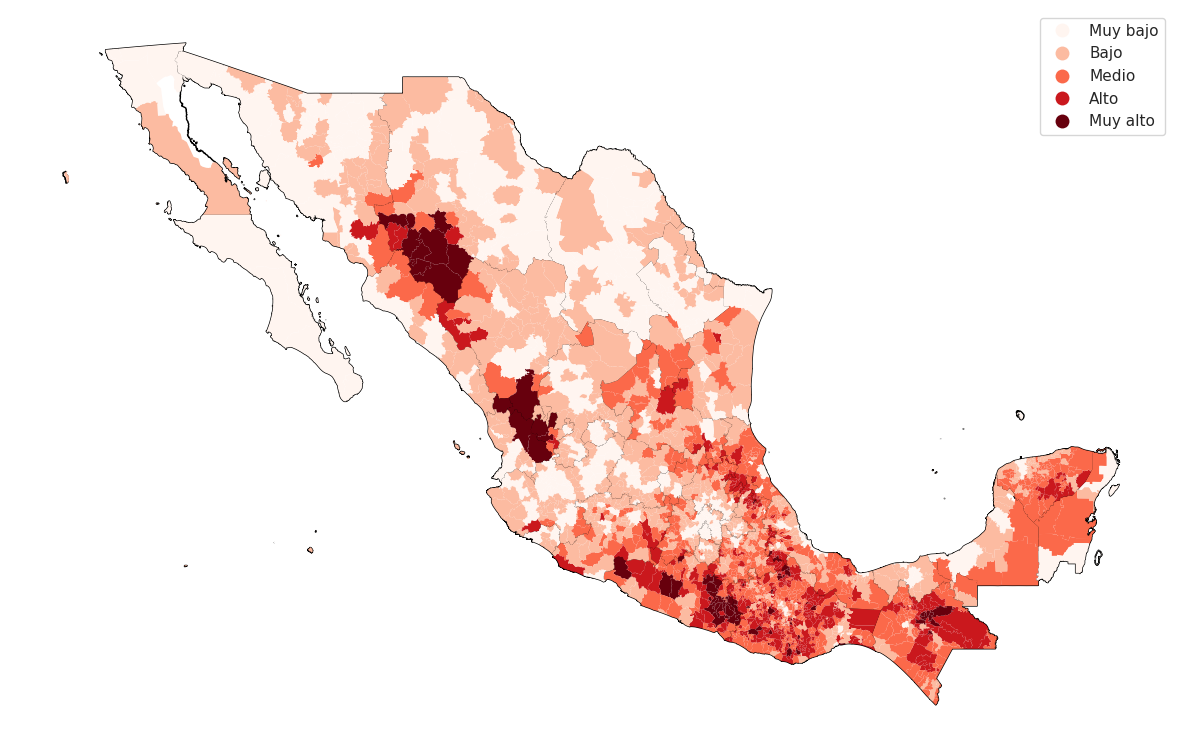

In [21]:
result_df = IM_New(data_indi, PC1)
result_df

IM_nuevo_df = result_df

# k-means con k=5 para 5 grupos
kmeans = KMeans(n_clusters=5, random_state=0).fit(IM_nuevo_df[['IM_nuevo']])
IM_nuevo_df['Cluster'] = kmeans.labels_

# Ordenar los clusters y asignar categorías
centroids = IM_nuevo_df.groupby('Cluster')['IM_nuevo'].mean().sort_values()
category_mapping = {cluster: category for cluster, category in zip(centroids.index, ['Muy alto', 'Alto', 'Medio', 'Bajo', 'Muy bajo'])}
IM_nuevo_df['GM_2020'] = IM_nuevo_df['Cluster'].map(category_mapping)

datav2 = data.copy() # Copiamos datos para genera imagen

# Eliminar la columna IMN_2020 pues el nuevo indice ya esta normalizado.
datav2.drop(columns=['IMN_2020'], inplace=True)
datav2['IM_2020'] = result_df['IM_nuevo']
datav2['GM_2020'] = IM_nuevo_df['GM_2020']
datav2['CVE_ENT'] = data['CVE_ENT'].apply(lambda x: f'{x:02}') #Corregir codigo
datav2['CVE_MUN'] = data['CVE_MUN'].apply(lambda x: f'{x:05}') #Corregir codigo

# Guardamos el datav2Frame modificado en un archivo CSV p'ara graficar la imagen
datav2.to_excel(carpeta_Ejercicio3 + '\\IMM_2020_V2.xlsx', index=False)

carpeta_Ejercicio3 = 'K:\\Mi unidad\\Google Drive\\MCE\\Ejercicios\\Ciencia de Datos\\Tarea 1\\Ejercicio3'
data_dir = carpeta_Ejercicio3 + '\\national'
fileindex_entidades = data_dir + '\\national_estatal.shp'
base = gpd.read_file(fileindex_entidades)
fileindex_municipios = data_dir +  '\\00mun.shp'
layer = gpd.read_file(fileindex_municipios)
layer = layer.to_crs("EPSG:4326") # Corrige el sistema de coordenadas de referencia para los municipios
# Datos del índice de marginación nuevo:
fileindex_imm = carpeta_Ejercicio3 + '\\IMM_2020_V2.xlsx'
lst_str_cols = ['CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN']
dict_dtypes = {x: 'str' for x in lst_str_cols}
marg_municipal = pd.read_excel(fileindex_imm, dtype=dict_dtypes)
marg_municipal = marg_municipal.set_index('CVE_MUN')
layer_marg = layer.merge(marg_municipal, how='left', left_on='CVEGEO', right_index=True)
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
base.plot(color='white', edgecolor='black', ax=ax) 
layer_marg.plot(column='GM_2020', categorical=True, legend=True, linewidth=0, ax=ax, cmap="Reds", 
                categories=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'])
ax.set_axis_off()
plt.savefig(carpeta_files + '\\Figura3_4.png', dpi = 300, bbox_inches = 'tight')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.



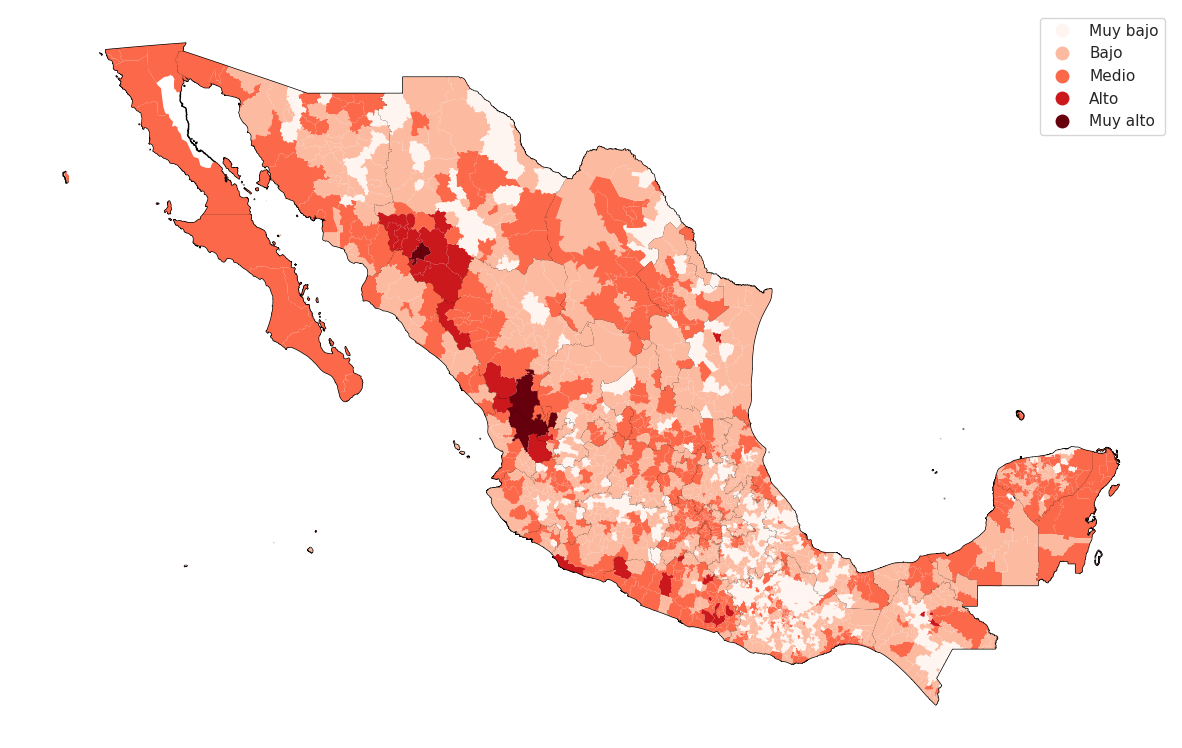

In [22]:
result_df = IM_New(data_indi, PC2)
result_df

IM_nuevo_df = result_df

# k-means con k=5 para 5 grupos
kmeans = KMeans(n_clusters=5, random_state=0).fit(IM_nuevo_df[['IM_nuevo']])
IM_nuevo_df['Cluster'] = kmeans.labels_

# Ordenar los clusters y asignar categorías
centroids = IM_nuevo_df.groupby('Cluster')['IM_nuevo'].mean().sort_values()
category_mapping = {cluster: category for cluster, category in zip(centroids.index, ['Muy alto', 'Alto', 'Medio', 'Bajo', 'Muy bajo'])}
IM_nuevo_df['GM_2020'] = IM_nuevo_df['Cluster'].map(category_mapping)

datav2 = data.copy() # Copiamos datos para genera imagen

# Eliminar la columna IMN_2020 pues el nuevo indice ya esta normalizado.
datav2.drop(columns=['IMN_2020'], inplace=True)
datav2['IM_2020'] = result_df['IM_nuevo']
datav2['GM_2020'] = IM_nuevo_df['GM_2020']
datav2['CVE_ENT'] = data['CVE_ENT'].apply(lambda x: f'{x:02}') #Corregir codigo
datav2['CVE_MUN'] = data['CVE_MUN'].apply(lambda x: f'{x:05}') #Corregir codigo

# Guardamos el datav2Frame modificado en un archivo CSV p'ara graficar la imagen
datav2.to_excel(carpeta_Ejercicio3 + '\\IMM_2020_V2.xlsx', index=False)

carpeta_Ejercicio3 = 'K:\\Mi unidad\\Google Drive\\MCE\\Ejercicios\\Ciencia de Datos\\Tarea 1\\Ejercicio3'
data_dir = carpeta_Ejercicio3 + '\\national'
fileindex_entidades = data_dir + '\\national_estatal.shp'
base = gpd.read_file(fileindex_entidades)
fileindex_municipios = data_dir +  '\\00mun.shp'
layer = gpd.read_file(fileindex_municipios)
layer = layer.to_crs("EPSG:4326") # Corrige el sistema de coordenadas de referencia para los municipios
# Datos del índice de marginación nuevo:
fileindex_imm = carpeta_Ejercicio3 + '\\IMM_2020_V2.xlsx'
lst_str_cols = ['CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN']
dict_dtypes = {x: 'str' for x in lst_str_cols}
marg_municipal = pd.read_excel(fileindex_imm, dtype=dict_dtypes)
marg_municipal = marg_municipal.set_index('CVE_MUN')
layer_marg = layer.merge(marg_municipal, how='left', left_on='CVEGEO', right_index=True)
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
base.plot(color='white', edgecolor='black', ax=ax) 
layer_marg.plot(column='GM_2020', categorical=True, legend=True, linewidth=0, ax=ax, cmap="Reds", 
                categories=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'])
ax.set_axis_off()
plt.savefig(carpeta_files + '\\Figura3_5.png', dpi = 300, bbox_inches = 'tight')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.



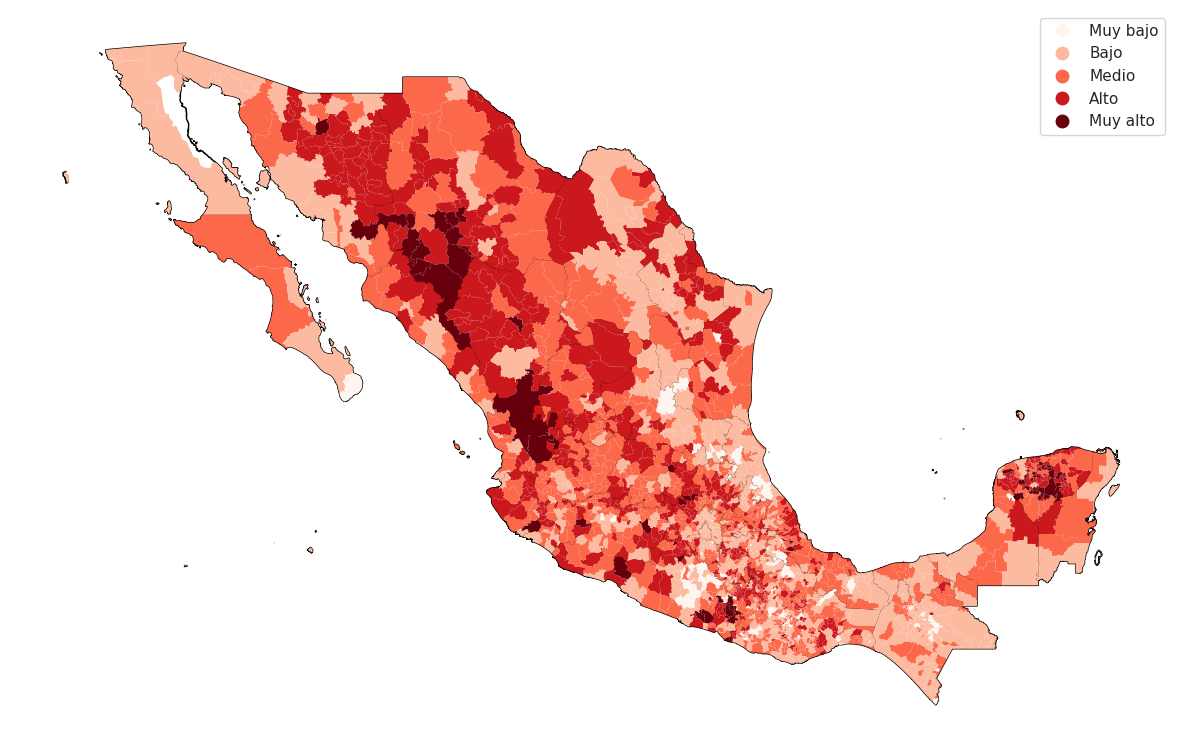

In [23]:
result_df = IM_New(data_indi, PC3)
result_df

IM_nuevo_df = result_df

# k-means con k=5 para 5 grupos
kmeans = KMeans(n_clusters=5, random_state=0).fit(IM_nuevo_df[['IM_nuevo']])
IM_nuevo_df['Cluster'] = kmeans.labels_

# Ordenar los clusters y asignar categorías
centroids = IM_nuevo_df.groupby('Cluster')['IM_nuevo'].mean().sort_values()
category_mapping = {cluster: category for cluster, category in zip(centroids.index, ['Muy alto', 'Alto', 'Medio', 'Bajo', 'Muy bajo'])}
IM_nuevo_df['GM_2020'] = IM_nuevo_df['Cluster'].map(category_mapping)

datav2 = data.copy() # Copiamos datos para genera imagen

# Eliminar la columna IMN_2020 pues el nuevo indice ya esta normalizado.
datav2.drop(columns=['IMN_2020'], inplace=True)
datav2['IM_2020'] = result_df['IM_nuevo']
datav2['GM_2020'] = IM_nuevo_df['GM_2020']
datav2['CVE_ENT'] = data['CVE_ENT'].apply(lambda x: f'{x:02}') #Corregir codigo
datav2['CVE_MUN'] = data['CVE_MUN'].apply(lambda x: f'{x:05}') #Corregir codigo

# Guardamos el datav2Frame modificado en un archivo CSV p'ara graficar la imagen
datav2.to_excel(carpeta_Ejercicio3 + '\\IMM_2020_V2.xlsx', index=False)

carpeta_Ejercicio3 = 'K:\\Mi unidad\\Google Drive\\MCE\\Ejercicios\\Ciencia de Datos\\Tarea 1\\Ejercicio3'
data_dir = carpeta_Ejercicio3 + '\\national'
fileindex_entidades = data_dir + '\\national_estatal.shp'
base = gpd.read_file(fileindex_entidades)
fileindex_municipios = data_dir +  '\\00mun.shp'
layer = gpd.read_file(fileindex_municipios)
layer = layer.to_crs("EPSG:4326") # Corrige el sistema de coordenadas de referencia para los municipios
# Datos del índice de marginación nuevo:
fileindex_imm = carpeta_Ejercicio3 + '\\IMM_2020_V2.xlsx'
lst_str_cols = ['CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN']
dict_dtypes = {x: 'str' for x in lst_str_cols}
marg_municipal = pd.read_excel(fileindex_imm, dtype=dict_dtypes)
marg_municipal = marg_municipal.set_index('CVE_MUN')
layer_marg = layer.merge(marg_municipal, how='left', left_on='CVEGEO', right_index=True)
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
base.plot(color='white', edgecolor='black', ax=ax) 
layer_marg.plot(column='GM_2020', categorical=True, legend=True, linewidth=0, ax=ax, cmap="Reds", 
                categories=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'])
ax.set_axis_off()
plt.savefig(carpeta_files + '\\Figura3_6.png', dpi = 300, bbox_inches = 'tight')
plt.show()

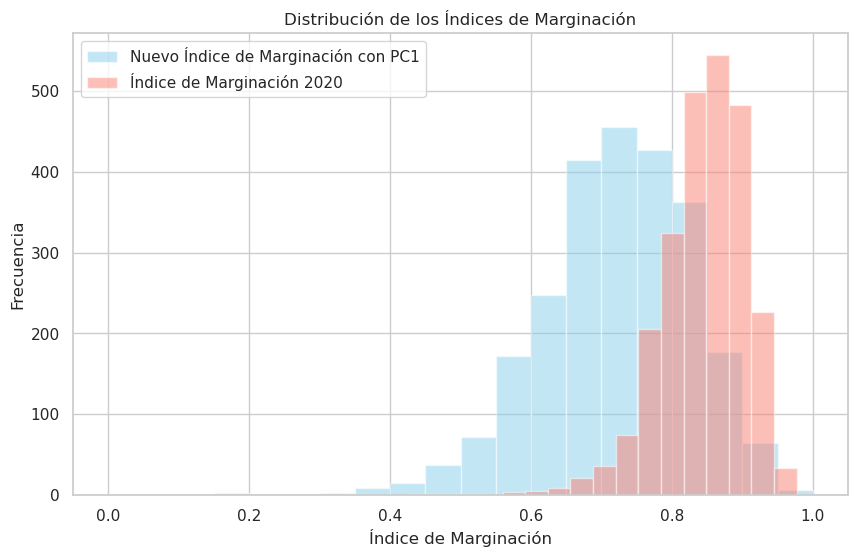

In [24]:
plt.figure(figsize=(10, 6))

# Histograma 1
plt.hist(IM_PC1['IM_nuevo'], bins=20, color='skyblue', alpha=0.5, label='Nuevo Índice de Marginación con PC1')

# Histograma 2
plt.hist(data['IMN_2020'], bins=20, color='salmon', alpha=0.5, label='Índice de Marginación 2020')

plt.title('Distribución de los Índices de Marginación')
plt.xlabel('Índice de Marginación')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.legend()
plt.show()

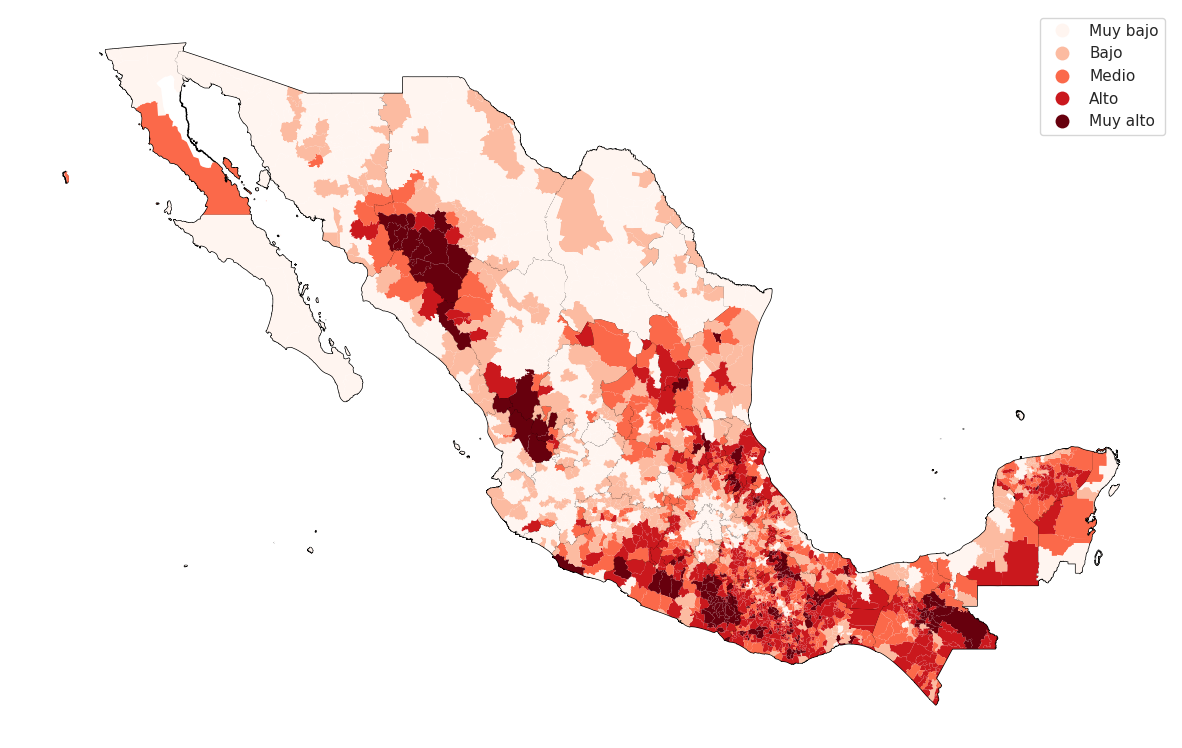

In [26]:
# ORIGINAL
# Ruta base de la carpeta Ejercicio3
carpeta_Ejercicio3 = 'K:\\Mi unidad\\Google Drive\\MCE\\Ejercicios\\Ciencia de Datos\\Tarea 1\\Ejercicio3'

# Ruta de la carpeta 'national' dentro de 'Ejercicio3'
data_dir = carpeta_Ejercicio3 + '\\national'

# lee la cartografía de entidades y municipios de México
fileindex_entidades = data_dir + '\\national_estatal.shp'
base = gpd.read_file(fileindex_entidades)

fileindex_municipios = data_dir +  '\\00mun.shp'
layer = gpd.read_file(fileindex_municipios)
layer = layer.to_crs("EPSG:4326") # Corrige el sistema de coordenadas de referencia para los municipios

# Datos del índice de marginación
fileindex_imm = data_ruta
# Especifica el tipo de variable string para los códigos de entidades y municipios
lst_str_cols = ['CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN']
dict_dtypes = {x: 'str' for x in lst_str_cols}
marg_municipal = pd.read_excel(fileindex_imm, sheet_name='IMM_2020', dtype=dict_dtypes)
marg_municipal = marg_municipal.set_index('CVE_MUN')

# Une la información cartográfica y del IM
layer_marg = layer.merge(marg_municipal, how='left', left_on='CVEGEO', right_index=True)

f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')

# Mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax) 

# Mapa de los municipios con su IM
layer_marg.plot(column='GM_2020', categorical=True, legend=True, linewidth=0, ax=ax, cmap="Reds", 
                categories=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'])

# Remove axis
ax.set_axis_off()
plt.savefig(carpeta_files + '\\Figura3_3.png', dpi = 300, bbox_inches = 'tight')
plt.show()